# TP1 : Histogramme et seuillage

Objectifs :

* Étudier la notion d’histogramme
* Extraire des caractéristiques (brillance, contraste…,) de l’image à partir de son histogramme
* Binariser une image par seuillage (manuel et automatique) de son histogramme
* Améliorer l’image par application de transformation sur son histogramme (étirement et égalisation)
* Mise en œuvre avec Python

Dans ce TP, nous allons travailler seulement avec des images en niveau de gris où chaque niveau de gris est codé sur 1 octet. Il y a donc 256 niveaux de gris accessibles...

## Import des modules de base

Exécutez la cellule suivante afin d'importer les modules **Numpy**, **Matplotlib** et **OpenCV**. Cette cellule doit être exécutée à chaque fois que vous réinitialisez le _kernel_.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

## 1 Histogramme

L’histogramme d’une image indique le nombre de pixels existant pour chaque valeur. Calculer l’histogramme de l’image en niveaux de gris, c’est, en d’autres termes, compter combien il y a de pixels pour chaque nuance de gris.


**1.1** Complétez la fonction ```histogramme``` qui calcule, dans un vecteur de taille 256, l’histogramme d’une image en niveaux de gris ($n \in [0...255]$).
Quelques fonctions qui pourraient être utiles :
* _imread_ de **OpenCV** pour lire l’image,
* _zeros_ de **Numpy** pour initialiser à 0 le vecteur,
* _shape_ pour obtenir le nombre de lignes et de colonnes de l’image.

In [69]:
def histogramme(img):
    if img is None:
        raise Exception("Impossible de charger l'image.")
    
    # Initialiser le vecteur d'histogramme à zéro
    histogramme = np.zeros(256, dtype=np.uint64)
    
    # Obtenir les dimensions de l'image
    lignes, colonnes = img.shape
    
    # Calculer l'histogramme en parcourant l'image
    for i in range(lignes):
        for j in range(colonnes):
            intensite_pixel = img[i, j]
            histogramme[intensite_pixel] += 1
    
    return histogramme

**1.2** Testez votre fonction sur les images _cellules.png_ et _irmCerveau.png_ affichées ci-dessous (téléchargées à partir de Moodle dans le même répertoire que ce notebook). 
Attention, même si visuellement les images ne semblent pas en couleur, elles peuvent être sur 3 canaux. Après avoir lu l’image en utilisant _cv.imread_, vérifiez que la variable est bien en 2 dimensions à l’aide de _shape_. Si non (3 dimensions), alors pour importer une image couleur en niveau de gris, il faut ajouter le paramètre _0_ dans la fonction _imread_ d’_opencv2_ : ```irm=cv.imread("irmCerveau.png",0)```

![Image](cellules.png) ![Image](irmCerveau.png)

In [70]:
img = cv.imread( "cellules.png",0 )
print(histogramme(img))

img2 = cv.imread( "irmCerveau.png",0 )
print(histogramme(img))

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    1    1    1    3    2
   15   12   12    9   16   23   50   20   25   21   16   19   25   17
   29   16   17   19    9   27   24   20   14   50   28   31   21   27
   31   32   29   25   37   51   37   34   31   35   40   35   41   55
   40   49   42   45   92   51   41   49   43   50   50   58   50   54
   59   57   73   56   65   55  154   66   65   52   59   67   77   61
   77   70   80   64   83   74   78   97   97   82   97   81  103   89
  155  109   87   90  113  121  130  105  124  118  103  123  122  135
  152  145  161  153  170  149  183  165  179  181  194  193  204  187
  206  203  184  194  195  206  204  204  225  212  216  199  181  196
  218  215  200  202  207  201  234  237  221  235  199  214  220  201
  198  220  203  214  228  190  227  214  200  230  227  214  191  220
  200  221  254  291  243  291  276  332  321  365  405  422  489  512
  557 

**1.3** Affichez les histogrammes des deux images (fonction utile : _plot_ de _matplotlib.pyplot_). Commentez.

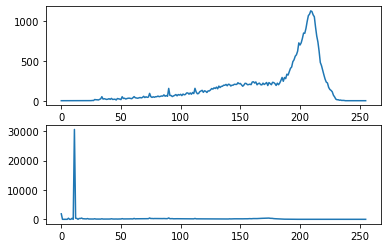

In [71]:
# Affichez les histogrammes
img = cv.imread( "cellules.png",0 )
plt.subplot(211)
plt.plot(histogramme(img))
plt.subplot(212)
img2 = cv.imread( "irmCerveau.png",0 )
plt.plot(histogramme(img2))

## 2 Histogramme cumulé

Le principe de l’histogramme cumulé (pas vu en amphi) est le même que pour l’histogramme, si ce n’est que pour toute valeur de niveau de gris $n$, on calcule non pas le nombre de pixels de cette valeur dans l’image, mais on cumule le nombre de pixels de valeur inférieure ou égale $n$ dans l’image.

**2.1** Ecrivez une fonction ```histogrammeCumule``` qui calcule, dans un vecteur de taille 256, l’histogramme cumulé de l’image.

In [19]:
def histogrammeCumule(img):
# Charger l'image en niveaux de gris
    if img is None:
        raise Exception("Impossible de charger l'image.")
    
    # Calculer l'histogramme de l'image
    
    # Calculer l'histogramme cumulé
    histogramme_cumule = np.cumsum(histogramme(img))
    
    return histogramme_cumule

**2.2** Testez votre fonction sur les mêmes images que précédemment.

In [72]:
# A compléter...
img = cv.imread( "cellules.png",0 )
print(histogrammeCumule(img))
# A compléter...

# Testez les fonction histogramme sur ces deux images
img2 = cv.imread( "irmCerveau.png",0 )
print(histogrammeCumule(img))

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     1
     2     3     6     8    23    35    47    56    72    95   145   165
   190   211   227   246   271   288   317   333   350   369   378   405
   429   449   463   513   541   572   593   620   651   683   712   737
   774   825   862   896   927   962  1002  1037  1078  1133  1173  1222
  1264  1309  1401  1452  1493  1542  1585  1635  1685  1743  1793  1847
  1906  1963  2036  2092  2157  2212  2366  2432  2497  2549  2608  2675
  2752  2813  2890  2960  3040  3104  3187  3261  3339  3436  3533  3615
  3712  3793  3896  3985  4140  4249  4336  4426  4539  4660  4790  4895
  5019  5137  5240  5363  5485  5620  5772  5917  6078  6231  6401  6550
  6733  6898  7077  7258  7452  7645  7849  8036  8242  8445  8629  8823
  9018  9224  9428  9632  9857 10069 10285 10484 10665 10861 11079 11294
 11494 11696 11903 12104 12338 12575 12796 13031 13

**2.3** Trouvez le code permettant d'afficher les histogrammes cumulés. Vous devez obtenir des résultats similaires aux histogrammes ci-dessous.

![Image](hist_cell_culm.png) ![Image](hist_cerveau_culm.png)

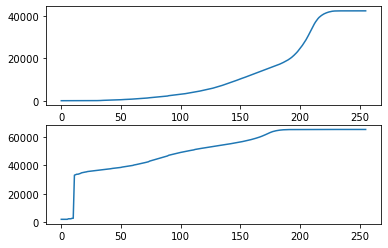

In [73]:
# A compléter...
img = cv.imread( "cellules.png",0 )
plt.subplot(211)
plt.plot(histogrammeCumule(img))
plt.subplot(212)
img2 = cv.imread( "irmCerveau.png",0 )
plt.plot(histogrammeCumule(img2))

## 3 Seuillage manuel

Le seuillage d’image est une technique simple de binarisation d’image. Elle consiste à transformer une image en niveau de gris en une image dont les valeurs de pixels ne peuvent avoir que la valeur 0 ou 1. On parle alors d’une image binaire ou image en noir et blanc.
Pour cela, le seuillage d’image remplace un à un les pixels d’une image à l’aide d’une valeur de seuil fixée. Ainsi, si un pixel a une valeur supérieure ou égale au seuil, il prendra la valeur 255 (blanc), et si sa valeur est inférieure, il prendra la valeur 0 (noir).

$$imageBinaire(i,j) = 
\begin{cases}
255\ si\ image(i, j) \geq seuil \\
0\ sinon\\
\end{cases}
$$

**3.1** Ouvrez l’image _cellules.png_.

In [28]:
img = cv.imread( "cellules.png", 0)

**3.2** À l’aide de la fonction écrite précédemment, calculez et affichez l’histogramme de l’image.

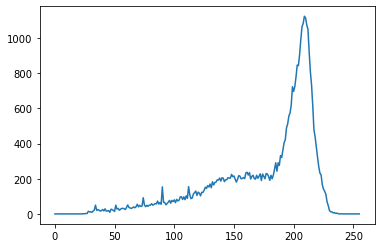

In [76]:
plt.plot(histogramme(img))

**3.3** Identifiez manuellement le seuil à appliquer pour extraire les noyaux du fond.

In [ ]:
seuil = 165

**3.4** Réalisez le seuillage à l’aide de _seuil,output=cv.threshold(image,seuil,255,cv.THRESH_BINARY)_.

In [79]:
def seuillage(img, seuil):
    # Charger l'image en niveaux de gris
    image = cv.imread(img, cv.IMREAD_GRAYSCALE)
    
    if image is None:
        raise Exception("Impossible de charger l'image.")
    
    # Appliquer le seuillage
    _, output = cv.threshold(image, seuil, 255, cv.THRESH_BINARY)
    
    return output

**3.5** Vérifiez, en visualisant l’image obtenue, que le résultat est satisfaisant.

In [86]:
# Exemple d'utilisation :
Cellules = "cellules.png"
image_seuillee = seuillage(Cellules, seuil)

# Afficher l'image seuillée (optionnel)
cv.imshow("Image Seuillée", image_seuillee)
cv.waitKey(0)
cv.destroyAllWindows()

## 4 Recadrage dynamique / Étirement d’histogramme

Plus la dynamique d’une image est étalée, meilleure est la qualité de l’image. Il est alors possible de modifier
cette dynamique en utilisant la transformation suivante :

$S(n) = round(M\frac{(n-a)}{(b-a)})$

où $n$ est le niveau de gris de l’image d’entrée, $a$ et $b$ sont les limites respectivement inférieure et supérieure de l’histogramme de l’image d’entrée, $M$ représente l’amplitude de l’image d’arrivée, _i.e._ la dynamique souhaitée (en général $255$) et $round$ est la fonction qui arrondit au plus proche. Cette fonction est indispensable puisque nous travaillons dans un espace discret avec un nombre limité de niveaux de gris.

**4.1** Lisez l’image ’evasion.png’ (affichée ci-dessous). À l’aide de la fonction écrite précédemment, calculez et affichez l’histogramme de l’image.

![Image](evasion.png)

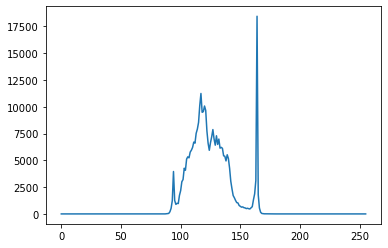

In [87]:
imgEvasion = cv.imread("evasion.png",0)
histEvasion = histogramme(imgEvasion)
plt.plot(histEvasion)
plt.show()

**4.2** Modifiez sa dynamique en utilisant la transformation de recadrage dynamique (rappelée ci-dessus) afin d’obtenir une image plus contrastée (étirement de l’histogramme).

In [89]:
def etirer_histogramme(image):
    # Charger l'image en niveaux de gris
    img = cv.imread(image, cv.IMREAD_GRAYSCALE)

    if img is None:
        raise Exception("Impossible de charger l'image.")
    
    # Trouver les valeurs minimales et maximales de niveaux de gris
    min_val = np.min(img)
    max_val = np.max(img)
    
    # Amplitude de l'image d'arrivée (dynamique souhaitée)
    M = 255
    
    # Appliquer la transformation de recadrage dynamique
    image_etiree = ((img - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    
    return image_etiree

**4.3** Comparer les histogrammes ainsi que les valeurs moyennes et les écarts-types initiaux et finaux.

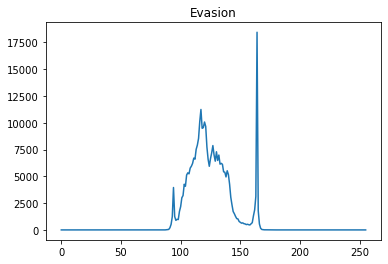

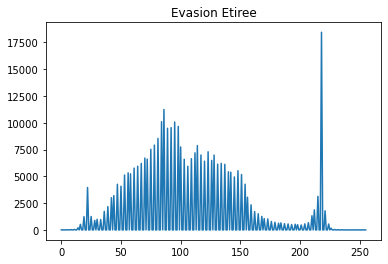

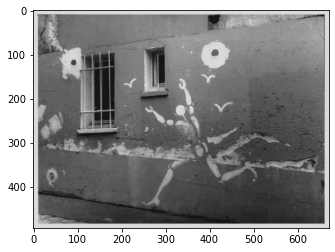

In [91]:
plt.plot(histEvasion)
plt.title("Evasion")
plt.show()

evasion_etiree = etirer_histogramme("evasion.png")
histEvasionEtiree = histogramme(evasion_etiree)
plt.plot(histEvasionEtiree)
plt.title("Evasion Etiree")
plt.show()

plt.imshow(evasion_etiree,cmap="gray")
plt.show()

## 5 Égalisation d’histogramme

L’égalisation d’histogramme consiste à corriger une image qui manque de contraste : ses couleurs, ou ses niveaux de gris, se concentrent sur seulement quelques valeurs.

Cette transformation va faire une conversion de couleurs :
- afin d’utiliser toute l’étendue des niveaux ;
- afin d’avoir (à peu près) autant de pixels de chaque niveau.

Le principe de l’égalisation d’histogramme est d’utiliser l’histogramme cumulé de l’image comme une table de conversions des niveaux de gris. Pour cela, on normalise les valeurs de l’histogramme cumulé pour les ramener entre 0 et 255.
L’idée de la conversion est alors la suivante :
- Tous les faibles niveaux inutilisés dans l’image (de 0 à 120 environ dans l’exemple ci-dessous) seront ramenés
à 0 ;
- Tous les hauts niveaux inutilisés (d’environ 200 à 255 dans l’exemple ci-dessous) seront ramenés à 255 ;
- Les seuls niveaux utilisés seront étalés entre 0 et 255 suivant la progression de l’histogramme cumulé (tout un niveau étant déplacé vers un nouveau niveau, ce qui intercalera des ”trous” de niveaux non utilisés dans l’image finale).

Exemple :

![Image](bay.png) ![Image](bay_hist.png)

**Gauche** : Hawke’s Bay : image peu contrastée ; **Droite** : Histogramme correspondant (en rouge) et
histogramme cumulé (en noir et normalisé en échelle pour l’affichage)

![Image](bay_egalisee.png) ![Image](bay_egalisee_hist.png)

**Gauche** : image mieux contrastée grâce à l’égalisation de son histogramme ; **Droite** : Le nouvel histogramme
correspondant (en rouge, démontrant l’utilisation de toute l’étendue de la dynamique des niveaux du noir au blanc),
ainsi que l’histogramme cumulé (en noir, démontrant la répartition plus régulière)

**5.1** Écrivez une fonction ```egalisationHistogramme``` qui met en œuvre le principe précédent pour égaliser l’histogramme d’une image en niveaux de gris afin d’en améliorer le contraste.

In [92]:
def egalisationHistogramme(img):
    # Charger l'image en niveaux de gris
    image = cv.imread(img, cv.IMREAD_GRAYSCALE)
    
    if image is None:
        raise Exception("Impossible de charger l'image.")
    
    # Calculer l'histogramme cumulé
    histcul = histogrammeCumule(image)
    
    # Normaliser l'histogramme cumulé entre 0 et 255
    histogramme_cumule_normalise = ((histcul - histcul.min()) / (histcul.max() - histcul.min()) * 255).astype(np.uint8)
    
    # Appliquer la transformation d'égalisation
    image_egalisee = histogramme_cumule_normalise[image]
    
    return image_egalisee

**5.2** Testez votre fonction sur l'image "bay.png". Vérifiez que l'image résultante, ainsi que son histogramme et son histogramme cumulé, correspondent aux figures affichées ci-dessus.

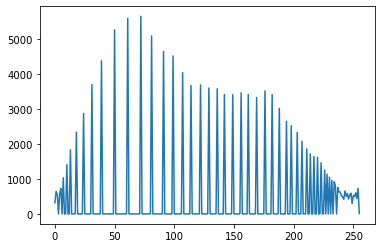

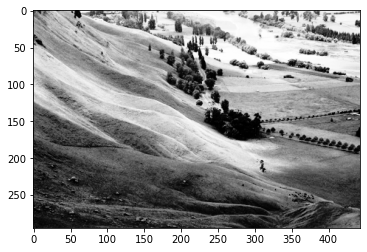

In [93]:
bayE = egalisationHistogramme("bay.png")
histBayE = histogramme(bayE)
plt.plot(histBayE)
plt.show()

plt.imshow(bayE,cmap="gray")
plt.show()

**5.2** Ouvrez l’image ’pneu.png’. Vérifiez que son histogramme est resserré dans les valeurs faibles. Calculez et affichez l’histogramme cumulé de cette image. Appliquer un recadrage dynamique par étirement d’histogramme (comme vu précédemment sur l’image evasion.png) a-t-il un sens pour cette image pneu ? Pourquoi ?

In [100]:
pneu = cv.imread("pneu.png",0)
histPneu = histogramme(pneu)
histCPneu = histogrammeCumule(pneu)
histCPneu = (histCPneu / histCPneu.max()) * histPneu.max()
plt.plot(histPneu)
plt.plot(histCPneu)
plt.show()
plt.imshow(pneu,cmap="gray")

**5.3** À l’aide de la fonction ```egalisationHistogramme``` écrite auparavant, transformez l’image en une image équivalente, mais ayant un histogramme égalisé. Comparez les histogrammes et histogrammes cumulés initiaux et finaux.

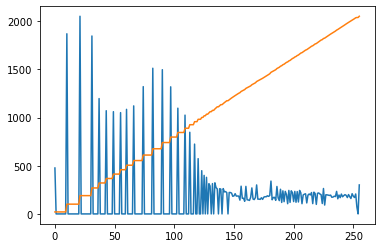

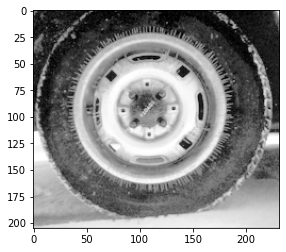

In [102]:
pneuE = egalisationHistogramme("pneu.png")
histPneuE = histogramme(pneuE)
histCPneuE = histogrammeCumule(pneuE)
histCPneuE = (histCPneuE / histCPneuE.max()) * histPneuE.max()
plt.plot(histPneuE)
plt.plot(histCPneuE)
plt.show()
plt.imshow(pneuE,cmap="gray")
plt.show()